# iSCAT Analysis Demo

This notebook demonstrates the analysis of multiple tracks at once using the `ListOfTracks` class.

In [15]:
from iscat_lib.analysis import ListOfTracks

Load the tracks from some example data. We can use `tracks.normalize` to set the initial time value of all tracks to 0.

In [16]:
tracks = ListOfTracks.from_file("../examples/more test data/180912 20nm GoldNP on 75DOPC25Chol (2kHz 100pc power)_Position_converted.csv", unit_length='micrometres')
tracks.normalize(normalize_t = True, normalize_xy = False)

We can plot all trajectories:

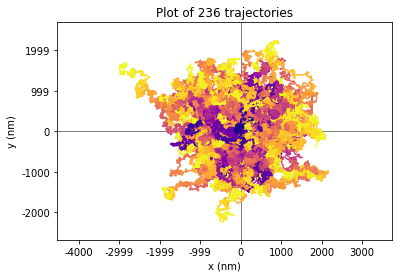

In [17]:
tracks.plot_trajectories()

Use ADC analysis on all tracks in bulk. This will calculate the MSD and D_app of all tracks and the perform model fits.

Since we're analyzing many tracks this can take a few minutes.

In [18]:
tracks.adc_analysis(maxfev=10000,fraction_fit_points=0.1)

[92, 165, 184, 207]

`tracks.adc_analysis` returns a list of tracks for which the analysis failed. This is most likely due to the fits not converging in time. We can either run `adc_analysis` again with a higher value for `maxfev` or perform the analysis "manually" on the remaining tracks using `get_track`.

We'll only do this for one track here as it can take a while and may not actually yield good results.

In [19]:
tracks.get_track(2).adc_analysis(maxfev=100000,fraction_fit_points=0.1)

{'analyzed': True,
 'model': 'hop',
 'Dapp': array([8.65476397e-13, 4.96143525e-13, 3.56496015e-13, ...,
        1.30690431e-13, 1.25918360e-13, 1.26295861e-13]),
 'results': {'brownian': {'params': array([1.94569582e-13, 3.47192981e-08]),
   'errors': array([1.00381855e-15, 8.04590412e-10]),
   'bic': -58.919015193885755,
   'rel_likelihood': 0.7370159597429179},
  'confined': {'params': array([3.81890979e-12, 8.59751945e-08, 0.00000000e+00]),
   'errors': array([0.00000000e+00, 8.27284839e-09, 5.15190550e+01]),
   'bic': -52.682662674954884,
   'rel_likelihood': 0.0326039448102115},
  'hop': {'params': array([1.99654317e-13, 1.09758734e-13, 2.52498079e-09, 8.75588664e-03]),
   'errors': array([1.38170827e-15, 2.81265713e-14, 1.40764070e-08, 1.88072618e-03]),
   'bic': -59.5293066579188,
   'rel_likelihood': 1.0},
  'n_points': 154,
  'R': 0.16666666666666666}}

`tracks.summary` averages the fit parameters, MSD and D_app by classified model. We have to specify `interpolation = True` since the time step sizes are not uniform across tracks. We can also specify whether `tracks.summary` should produce plots.

Tracks that have not yet been analyzed will be ignored.

{'sector_brownian_area': 0.771551724137931,
 'sector_confined_area': 0.0,
 'sector_hop_area': 0.22844827586206898,
 'average_params': {'brownian': array([8.76602695e-12, 5.62946899e-06]),
  'confined': None,
  'hop': array([3.26228294e-12, 1.95625923e-08, 1.05340604e-06, 8.05801662e-01])},
 'average_msd': {'brownian': array([1.82969545e-15, 3.07902637e-15, 4.29572359e-15, ...,
         7.21926253e-13, 6.93783575e-13, 6.71380917e-13]),
  'confined': None,
  'hop': array([2.21830714e-15, 3.60968458e-15, 4.95370829e-15, ...,
                    nan,            nan,            nan])},
 'average_dapp': {'brownian': array([1.86840998e-13, 1.11277968e-13, 9.40274172e-14, ...,
         1.00401404e-14, 9.64633318e-15, 9.33251206e-15]),
  'confined': None,
  'hop': array([2.50284191e-13, 1.32814365e-13, 1.09033258e-13, ...,
                    nan,            nan,            nan])}}

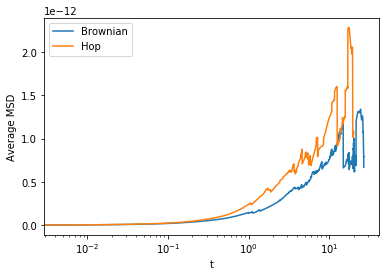

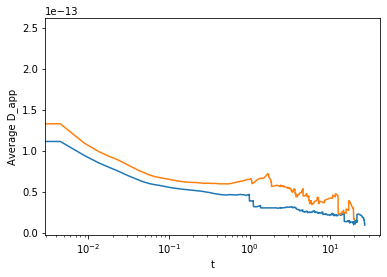

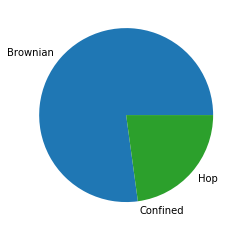

In [20]:
tracks.summary(interpolation = True, plot_dapp = True, plot_msd = True, plot_pie_chart = True)

Let's also perform MSD analysis. This should be a lot faster since the MSD is already calculated for each track.

In [21]:
tracks.msd_analysis()

[]

We can now plot the MSD analyis results of single tracks:

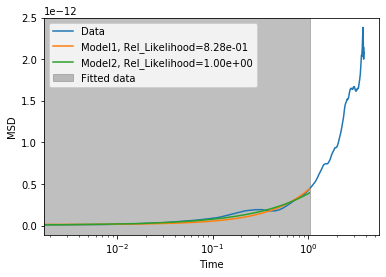

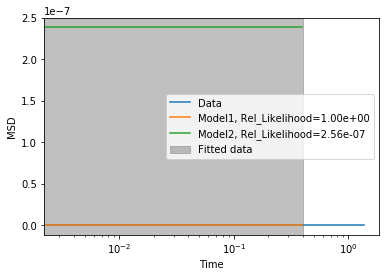

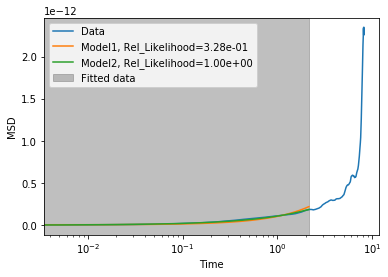

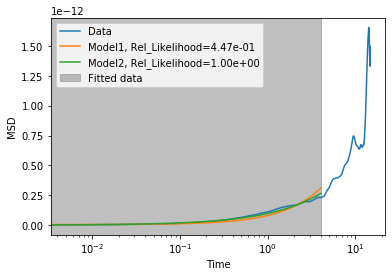

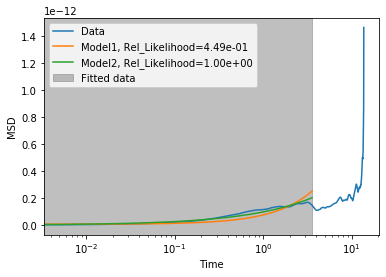

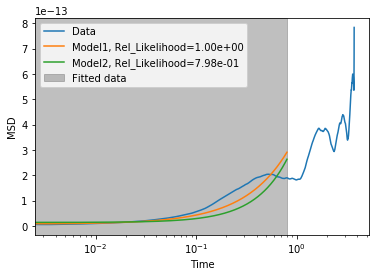

In [22]:
tracks.get_track(4).plot_msd_analysis_results()
tracks.get_track(8).plot_msd_analysis_results()
tracks.get_track(15).plot_msd_analysis_results()
tracks.get_track(16).plot_msd_analysis_results()
tracks.get_track(23).plot_msd_analysis_results()
tracks.get_track(42).plot_msd_analysis_results()

We can do the same for the ADC analysis results:

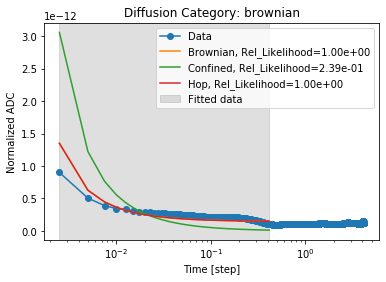

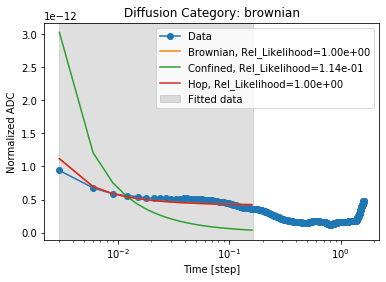

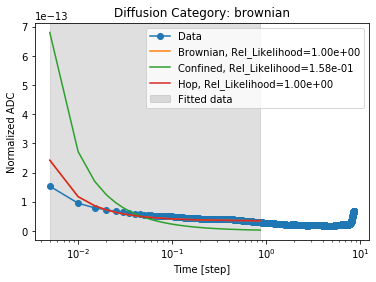

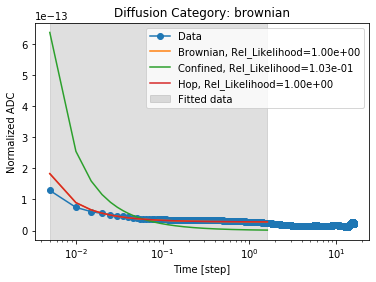

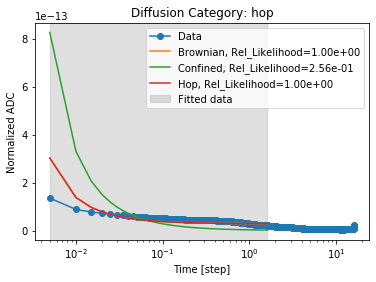

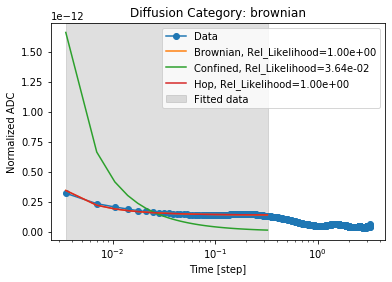

In [23]:
tracks.get_track(4).plot_adc_analysis_results()
tracks.get_track(8).plot_adc_analysis_results()
tracks.get_track(15).plot_adc_analysis_results()
tracks.get_track(16).plot_adc_analysis_results()
tracks.get_track(23).plot_adc_analysis_results()
tracks.get_track(42).plot_adc_analysis_results()

It is also possible to retreive the lists of tracks that have been classified as a specific model using a specified method:

In [24]:
tracks_brownian = tracks.get_sublist(method='adc', model='brownian')
tracks_hop = tracks.get_sublist(method='adc', model='hop')

We can now again plot the trajectories, but divided by the diffusion model:

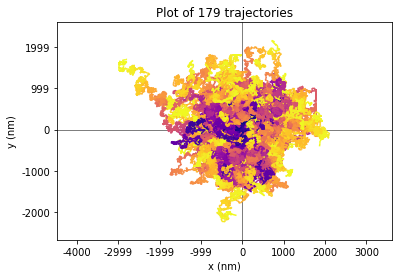

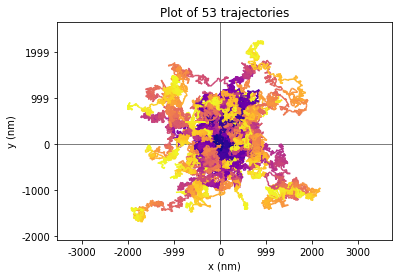

In [25]:
tracks_brownian.plot_trajectories()
tracks_hop.plot_trajectories()

The summary will now contain only the corresponding diffusion model:

{'sector_brownian_area': 0.0,
 'sector_confined_area': 0.0,
 'sector_hop_area': 1.0,
 'average_params': {'brownian': None,
  'confined': None,
  'hop': array([3.26228294e-12, 1.95625923e-08, 1.05340604e-06, 8.05801662e-01])},
 'average_msd': {'brownian': None,
  'confined': None,
  'hop': array([2.21830714e-15, 3.45754175e-15, 4.67107213e-15, ...,
         1.08924705e-12, 1.06639623e-12, 1.01396532e-12])},
 'average_dapp': {'brownian': None,
  'confined': None,
  'hop': array([2.50284191e-13, 1.38474719e-13, 1.12881222e-13, ...,
         1.70422082e-14, 1.66805116e-14, 1.58564219e-14])}}

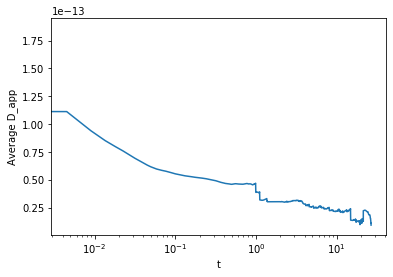

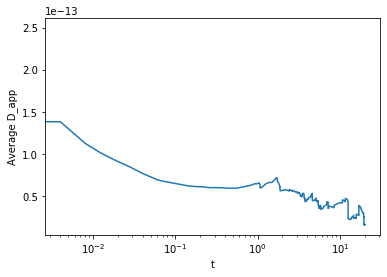

In [26]:
tracks_brownian.summary(interpolation=True, plot_dapp=True)
tracks_hop.summary(interpolation=True, plot_dapp=True)

More demonstration and tutorial notebooks can be found in this directory or in the built documentation. 